In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%pylab inline
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df1 = pd.read_csv('Mapped_31_oct.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','High'])
df1.head()

,News_Label,Twitt_Label,High,Volume
0,0,0,6265.25,0.749792
1,0,0,6264.98,0.008472
2,0,0,6264.98,0.001065
3,0,0,6264.98,0.001065
4,0,0,6264.98,0.001065


In [30]:
y1 = pd.read_csv('Mapped.csv',index_col=False,usecols=['High'])
y1.head()

,High
0,6256.56
1,6257.00
2,6256.56
3,6256.56
4,6256.56


In [62]:
def display(reg,Y_train,Y_test,Y_predict,X_train):
    print(reg.feature_importances_)
    feature_imp = pd.Series(reg.feature_importances_,index=X_train.columns)
    feature_imp.plot(kind='barh',figsize=(7,6))
    print("Mean absolute error :",metrics.mean_absolute_error(Y_test,Y_predict))
    print("Mean squared error :",metrics.mean_squared_error(Y_test,Y_predict))
    print("Root mean square error :",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)),"\n")
    
    y_oob = reg.oob_prediction_
#     print("C stat :",metrics.roc_auc_score(Y_train,y_oob))

In [74]:
def fit_model(df,y):
    X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size = 0.3)
#     train_size = int(len(df)*0.7)
#     test_size = int(len(df)*0.3)
#     print(train_size,test_size)
#     X_train,Y_train,X_test,Y_test = df[0:train_size],y[0:train_size],df[train_size:len(df1)],y[train_size:len(df1)]
    reg = RandomForestRegressor(n_estimators=100,oob_score=True)
    reg.fit(X_train,Y_train)
    Y_predict = reg.predict(X_test)
    print('Cross validation on training data,',reg.score(X_train,Y_train))
    print('Cross validation on testing data,',reg.score(X_test,Y_test))
    
    display(reg,Y_train,Y_test,Y_predict,X_train)
    return reg,X_train,Y_train,Y_test,Y_predict

## High value

c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Cross validation on training data, 0.9904226120995971
Cross validation on testing data, 0.949115347392905
[0.00281149 0.00871142 0.6724413  0.31603579]
Mean absolute error : 0.30398463296550904
Mean squared error : 1.182883575085388
Root mean square error : 1.0876045122586555 



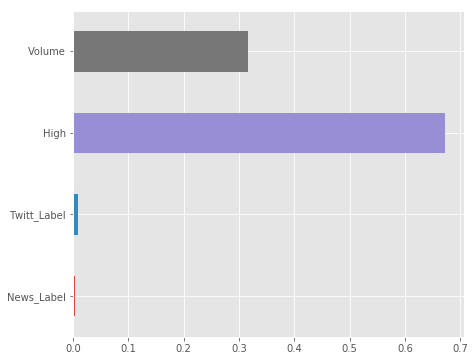

In [75]:
reg,X_train,Y_train,Y_test,Y_predict = fit_model(df1,y1)

# X_train = df1[0:,:],
# print(X_train)
# scores = cross_val_score(reg,df1,y1.values.ravel(),cv = 5)
# print(scores)
# for i in range(10):
#     reg,Y_test,Y_predict = fit_model(df,y1)
#     print(np.mean(Y_predict))
# np.unique(Y_predict[1])
# print(reg.oob_score_)

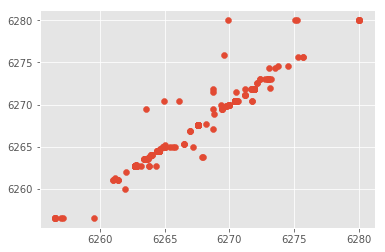

In [76]:
plt.scatter(Y_predict,Y_test)

      High  Predicted
0  6263.58  6263.5800
1  6262.69  6262.6900
2  6274.53  6273.7314
3  6265.36  6266.4810
4  6279.99  6279.9900


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


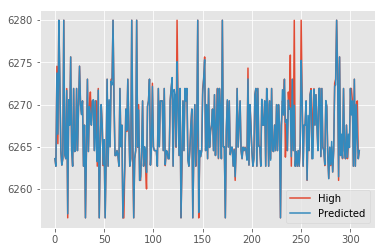

In [77]:
Y_test.reset_index(inplace=True,drop=True)
Y_test['Predicted'] = Y_predict
print(Y_test.head())
Y_test.plot()
plt.show()

Text(0.5, 0, 'Level')

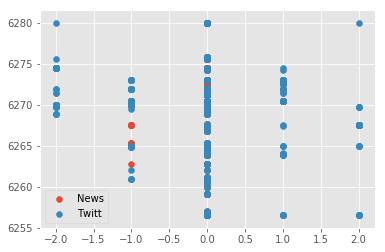

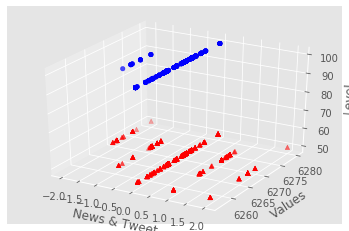

In [70]:
#Input volume and twitt relation with output
plt.scatter(X_train.News_Label,Y_train.High,label = "News")
plt.scatter(X_train.Twitt_Label,Y_train.High, label = "Twitt")
plt.legend()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train.News_Label, Y_train.High,100, c='b', marker='o')
ax.scatter(X_train.Twitt_Label,Y_train.High,50,c = 'r',marker = '^')
ax.set_xlabel("News & Tweet")
ax.set_ylabel("Values")
ax.set_zlabel("Level")

Text(0, 0.5, 'Testing')

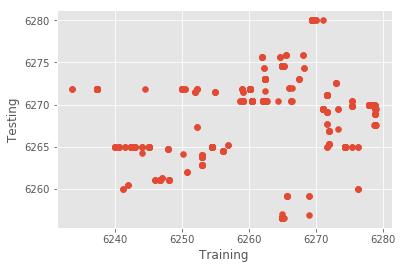

In [71]:
#Historical with output
plt.scatter(X_train.High,Y_train.High)
plt.xlabel("Training")
plt.ylabel("Testing")

In [72]:
print(Y_predict[0:10])
print(Y_test.head(10))

[6268.116     6268.116     6267.0842    6268.116     6268.116
 6267.3156    6267.4082883 6267.3156    6267.4082883 6269.8857883]
      High    Predicted
0  6264.14  6268.116000
1  6264.14  6268.116000
2  6264.14  6267.084200
3  6264.14  6268.116000
4  6264.14  6268.116000
5  6264.60  6267.315600
6  6264.60  6267.408288
7  6264.60  6267.315600
8  6264.60  6267.408288
9  6264.54  6269.885788


In [73]:
#Error = Experimental - Theoretical / Theoretical
# print(len(Y_test),len(Y_predict))
temp1 = sum([np.abs(y-x)/y for x,y in zip(Y_predict,Y_test.as_matrix())])
print(temp1 * 100 / len(Y_test))
print(np.abs(np.mean(Y_predict) - np.mean(Y_test.as_matrix())) * 100 / np.mean(Y_test.as_matrix()))

0.08401992759845543
0.04199163134495985


## Open value

In [18]:
df2 = pd.read_csv('Mapped_31_oct.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','Open'])
df2.head()
y2 = pd.read_csv('Mapped.csv',index_col=False,usecols=['Open'])
y2.head()

,Open
0,6256.56
1,6256.76
2,6256.56
3,6256.56
4,6256.56


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.00239983 0.01383639 0.67324528 0.3105185 ]
Mean absolute error : 0.30665967206044614
Mean squared error : 0.8692541597061757
Root mean square error : 0.9323380072195789 



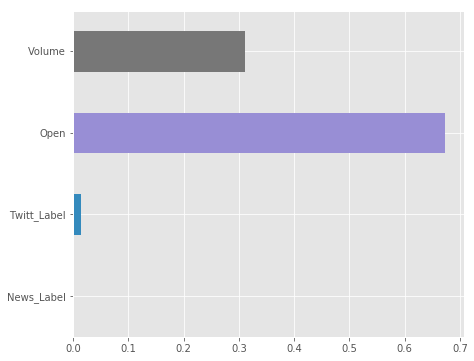

In [19]:
reg,X_train,Y_train,Y_test,Y_predict = fit_model(df2,y2)

In [20]:
#Error = Experimental - Theoretical / Theoretical
# print(len(Y_test),len(Y_predict))
temp1 = sum([np.abs(y-x)/y for x,y in zip(Y_predict,Y_test.as_matrix())]) #Mean absolute percentage error
print(temp1 * 100 / len(Y_test))
print(np.abs(np.mean(Y_predict) - np.mean(Y_test.as_matrix())) * 100 / np.mean(Y_test.as_matrix()))

0.0048946730344483136
0.0007070661723589831


      Open  Predicted
0  6271.89  6271.6686
1  6267.25  6267.2500
2  6264.94  6265.1035
3  6264.54  6264.5400
4  6269.04  6268.5591


c:\users\abid inamdar\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


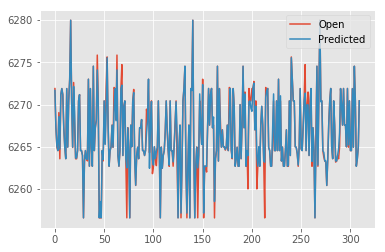

In [21]:
Y_test.reset_index(inplace=True,drop=True)
Y_test['Predicted'] = Y_predict
print(Y_test.head())
Y_test.plot()
plt.show()